In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score

In [5]:
RC_circuit_db = pd.read_csv('./db_completa_RC_Tecnologia.csv')
RC_circuit_db.head()

,time,voltaje_ent,voltaje_cap_5,R_5,C_5,voltaje_cap_8,R_8,C_8,voltaje_cap_10,R_10,C_10,voltaje_cap_12,R_12,C_12,voltaje_cap_15,R_15,C_15
0,0,4.93,0.00,55300,0.0001,0.00,1750,0.0047,0.0,99300,0.0001,0.0,53100,0.00022,0.00,14920,0.001
1,200,4.93,0.00,55300,0.0001,0.12,1750,0.0047,0.0,99300,0.0001,0.0,53100,0.00022,0.00,14920,0.001
2,400,4.93,0.02,55300,0.0001,0.30,1750,0.0047,0.0,99300,0.0001,0.0,53100,0.00022,0.00,14920,0.001
3,600,4.93,0.24,55300,0.0001,0.50,1750,0.0047,0.0,99300,0.0001,0.0,53100,0.00022,0.00,14920,0.001
4,800,4.93,0.43,55300,0.0001,0.66,1750,0.0047,0.0,99300,0.0001,0.0,53100,0.00022,0.04,14920,0.001


In [6]:
RC_circuit_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   time            4000 non-null   int64  
 1   voltaje_ent     4000 non-null   float64
 2   voltaje_cap_5   4000 non-null   float64
 3   R_5             4000 non-null   int64  
 4   C_5             4000 non-null   float64
 5   voltaje_cap_8   4000 non-null   float64
 6   R_8             4000 non-null   int64  
 7   C_8             4000 non-null   float64
 8   voltaje_cap_10  4000 non-null   float64
 9   R_10            4000 non-null   int64  
 10  C_10            4000 non-null   float64
 11  voltaje_cap_12  4000 non-null   float64
 12  R_12            4000 non-null   int64  
 13  C_12            4000 non-null   float64
 14  voltaje_cap_15  4000 non-null   float64
 15  R_15            4000 non-null   int64  
 16  C_15            4000 non-null   float64
dtypes: float64(11), int64(6)
memory u

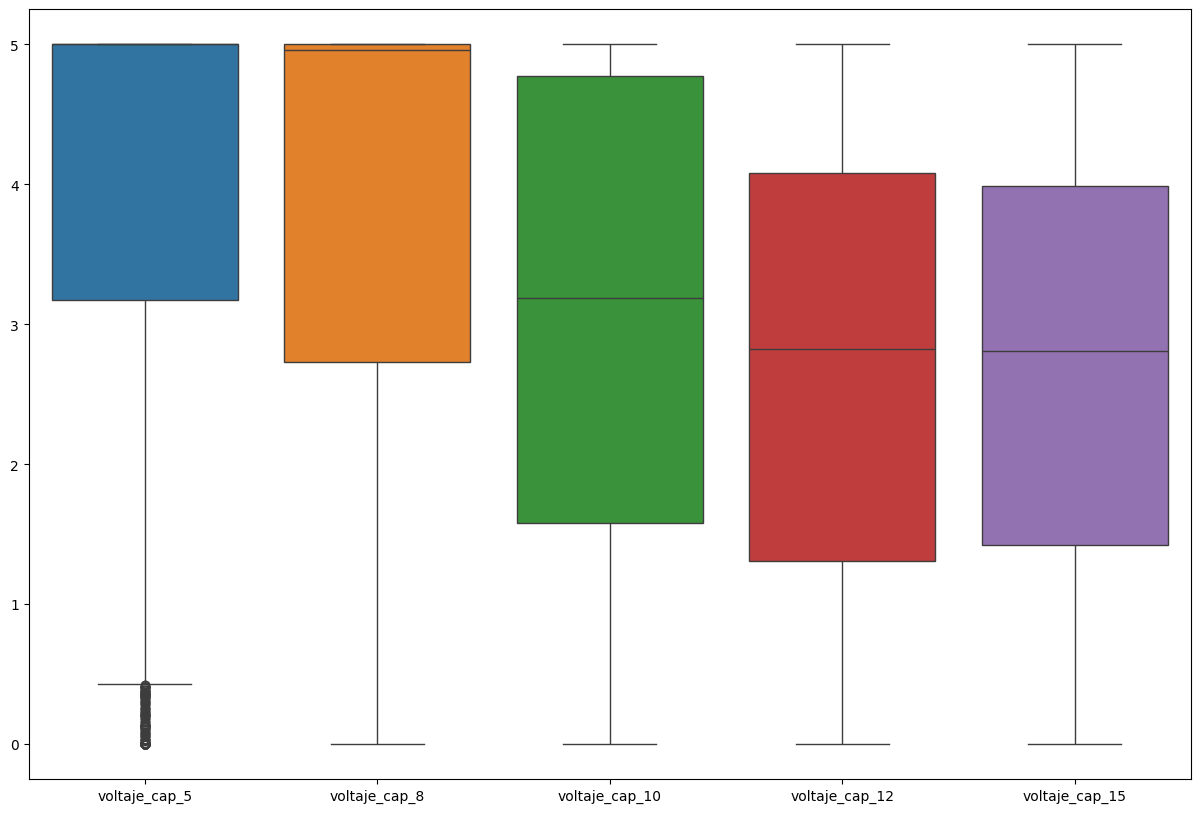

In [7]:
fig, ax = plt.subplots(figsize=(15,10))         # Sample figsize in inches
sns.boxplot(data = RC_circuit_db.drop(['time', 'voltaje_ent', 'R_5', 'C_5', 'R_8', 'C_8', 'R_10', 'C_10', 'R_12', 'C_12', 'R_15', 'C_15'], axis = 1))
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

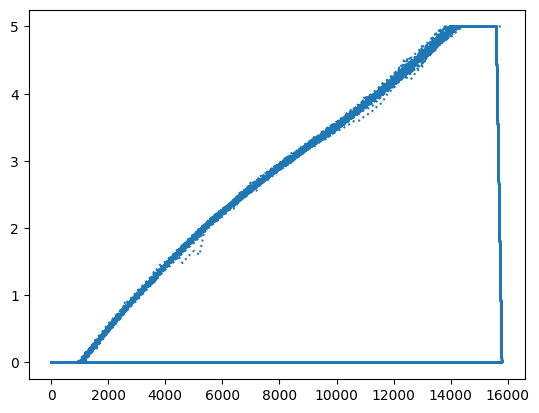

In [8]:
plt.figure()
plt.plot(RC_circuit_db['time'], RC_circuit_db['voltaje_cap_12'],':')
plt.show

In [9]:
#Plot pairwise relationships in a dataset.
sns.pairplot(RC_circuit_db)
plt.show()

KeyboardInterrupt: 

In [ ]:
# Correlation between variables
def fcn_corr_matrix(corr_mat):
    '''
    Function to convert a panda correlation matrix into tidy format
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['var_1','var_2','r']
    corr_mat = corr_mat.loc[corr_mat['var_1'] != corr_mat['var_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)

In [ ]:
corr_matrix = RC_circuit_db.select_dtypes(include=['float64', 'int']).corr(method='pearson')
fcn_corr_matrix(corr_matrix).head(10)

In [ ]:
# Matriz de correlacion utilizando seaborn
fig, ax = plt.subplots(figsize=(15,10))         # Sample figsize in inches
sns.heatmap(corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
)
plt.show()

In [ ]:
#X = [tiempo, R, C, Ve]
#y = [Vc]


R = np.hstack([RC_circuit_db['R_5'], RC_circuit_db['R_8'], RC_circuit_db['R_10'], RC_circuit_db['R_12'], RC_circuit_db['R_15']])
C = np.hstack([RC_circuit_db['C_5'], RC_circuit_db['C_8'], RC_circuit_db['C_10'], RC_circuit_db['C_12'], RC_circuit_db['C_15']])
t = np.hstack([RC_circuit_db['time'], RC_circuit_db['time'], RC_circuit_db['time'], RC_circuit_db['time'], RC_circuit_db['time']])
Ve = np.hstack([RC_circuit_db['voltaje_ent'], RC_circuit_db['voltaje_ent'], RC_circuit_db['voltaje_ent'], RC_circuit_db['voltaje_ent'], RC_circuit_db['voltaje_ent']])

# Input variables
X = np.vstack([R, C, t, Ve]).T

# Target
y = np.hstack([RC_circuit_db['voltaje_cap_5'], RC_circuit_db['voltaje_cap_8'], RC_circuit_db['voltaje_cap_10'], RC_circuit_db['voltaje_cap_12'], RC_circuit_db['voltaje_cap_15']])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 2002)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(14000, 4)
(6000, 4)
(14000,)
(6000,)


In [ ]:
#%% Specify the model
model = LinearRegression()

#%% Fit model on the dataset
model.fit(X_train, # input data
          y_train, # target data
          )

LinearRegression()

In [ ]:
# Predict on training data
pred_tr = model.predict(X_train)

# Predict on a test data
pred_te = model.predict(X_test)

In [ ]:
print("RMSE (train):", np.sqrt(np.mean( (y_train-pred_tr)**2) ))
print("RMSE (test):", np.sqrt(np.mean( (y_test-pred_te)**2) ))

RMSE (train): 0.7831599427559048
RMSE (test): 0.7849437007829371


In [ ]:
def regression_results(y_true, y_pred):
    # Regression metrics
    ev = explained_variance_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred) 
    mse = mean_squared_error(y_true, y_pred) 
    r2 = r2_score(y_true, y_pred)

    print('explained_variance: ', round(ev,4))    
    print('MAE: ', round(mae,4))
    print('MSE: ', round(mse,4))
    print('R²: ', round(r2,4))

In [ ]:
#%% Model Performance Summary    
print("")
print('---------- Evaluation on Training Data ----------')
regression_results(y_train, pred_tr)
print("")

print('---------- Evaluation on Test Data ----------')
regression_results(y_test, pred_te)
print("")

#%% Results per output
mse_train = mean_squared_error(y_train, pred_tr)

r2_train = r2_score(y_train, pred_tr)

mse_test = mean_squared_error(y_test, pred_te)

r2_test = r2_score(y_test, pred_te)

col_names = ('MSE (train)', 'R2 (train)', 'MSE (test)', 'R2 (test)')

df = np.array([mse_train, r2_train, mse_test, r2_test])

print("")
print('---------- Evaluation per output ----------')
results = pd.DataFrame(data = df.reshape(1,-1), columns = col_names)
print(results)


---------- Evaluation on Training Data ----------
explained_variance:  0.7853
MAE:  0.5565
MSE:  0.6133
R²:  0.7853

---------- Evaluation on Test Data ----------
explained_variance:  0.7873
MAE:  0.5601
MSE:  0.6161
R²:  0.7873


---------- Evaluation per output ----------
   MSE (train)  R2 (train)  MSE (test)  R2 (test)
0     0.613339    0.785338    0.616137   0.787265
